In [15]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Rla-GusWns/data/main/samsung.csv')

df.head()

,date,close,start,high,low,volume,transactionPrice,capitalization
0,2022-11-22,60600,60900,61200,60300,9411289,5.714610e+11,3.617690e+14
1,2022-11-21,61400,61400,61800,60800,9378097,5.737830e+11,3.665450e+14
2,2022-11-18,61800,61800,62400,61400,12236503,7.574550e+11,3.689330e+14
3,2022-11-17,61400,62000,62000,61300,13298296,8.191190e+11,3.665450e+14
4,2022-11-16,62700,62400,62700,61700,12909260,8.042200e+11,3.743050e+14


In [16]:
from sklearn.preprocessing import MinMaxScaler

df_number = df.iloc[0:,1:8]

scaler = MinMaxScaler()
scaler.fit(df_number) # 정규화 
df_scaled = scaler.transform(df_number)

In [17]:
import numpy as np

X = df_scaled[:,1:7] # 주가에 영향을 끼치는 요소

print(X) 

[[0.30388693 0.27941176 0.29929577 0.11323498 0.10003023 0.28673839]
 [0.32155477 0.30147059 0.31690141 0.11220339 0.10104593 0.31541343]
 [0.33568905 0.32352941 0.33802817 0.20104148 0.18138855 0.32975095]
 ...
 [0.83745583 0.83088235 0.78521127 0.30720321 0.36368301 0.79570235]
 [0.83745583 0.82352941 0.79929577 0.50539434 0.57474906 0.81362425]
 [0.74204947 0.79411765 0.74647887 0.67563057 0.74556769 0.79928673]]


In [18]:
y = df_scaled[:,0] # 주가
y = y.reshape(248,1) # 굳이 필요 없지만 가시성을 위해서

print(y)

[[0.28673835]
 [0.31541219]
 [0.3297491 ]
 [0.31541219]
 [0.36200717]
 [0.35125448]
 [0.33333333]
 [0.36917563]
 [0.27956989]
 [0.33691756]
 [0.3297491 ]
 [0.27240143]
 [0.2437276 ]
 [0.23655914]
 [0.25089606]
 [0.26523297]
 [0.2437276 ]
 [0.16845878]
 [0.24731183]
 [0.2437276 ]
 [0.1827957 ]
 [0.17562724]
 [0.11827957]
 [0.10394265]
 [0.11469534]
 [0.13978495]
 [0.14336918]
 [0.13261649]
 [0.09318996]
 [0.11469534]
 [0.10035842]
 [0.12903226]
 [0.13261649]
 [0.1218638 ]
 [0.09318996]
 [0.01792115]
 [0.        ]
 [0.01075269]
 [0.05734767]
 [0.04659498]
 [0.06810036]
 [0.06451613]
 [0.09677419]
 [0.11469534]
 [0.13620072]
 [0.12903226]
 [0.1218638 ]
 [0.15053763]
 [0.19713262]
 [0.10752688]
 [0.1218638 ]
 [0.16129032]
 [0.16129032]
 [0.17562724]
 [0.2078853 ]
 [0.25448029]
 [0.22222222]
 [0.21505376]
 [0.26523297]
 [0.25448029]
 [0.22939068]
 [0.23297491]
 [0.26523297]
 [0.29749104]
 [0.31899642]
 [0.27956989]
 [0.30107527]
 [0.27240143]
 [0.26164875]
 [0.23297491]
 [0.26523297]
 [0.29

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) 

# 모델을 설정합니다.
model = Sequential()
model.add(Dense(10, input_dim = 6, activation = 'relu'))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

# 모델을 컴파일합니다.
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

# 조기 종료 
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 20)

# 모델을 실행합니다.
history= model.fit(X_train, y_train, epochs = 2000, batch_size = 10, validation_split = 0.25, callbacks = early_stopping_callback ) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                70        
                                                                 
 dense_1 (Dense)             (None, 30)                330       
                                                                 
 dense_2 (Dense)             (None, 20)                620       
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,041
Trainable params: 1,041
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
15/15 [==============================] - 0s 8ms/step - loss: 0.0706 - mse: 0.0706 - val_loss: 0.0552 - val_mse: 0.0552
Epoch 2/2000
15/15 [==============================] - 

2/2 [==============================] - 0s 998us/step


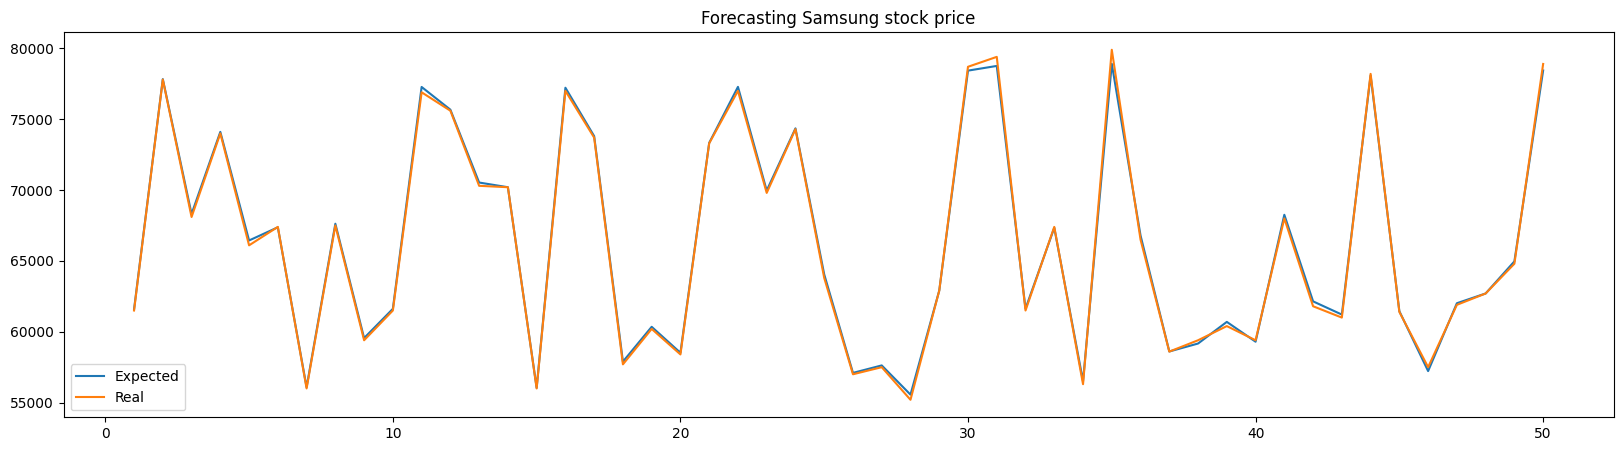

In [20]:
import matplotlib.pyplot as plt

real_prices = []
pred_prices = []
X_num = []

n_iter = 0
Y_prediction = model.predict(X_test).flatten()
for i in range(50):
  real = (y_test[i] * 27900) + 52600
  prediction = (Y_prediction[i] * 27900 ) + 52600
  #print('Real price: {}, Expected price: {}'.format(real, prediction))
  real_prices.append(real)
  pred_prices.append(prediction)
  n_iter = n_iter + 1
  X_num.append(n_iter)

plt.figure(figsize=(20,5))
plt.plot(X_num, pred_prices, label = 'Expected')
plt.plot(X_num, real_prices, label = 'Real')
plt.legend()
plt.title("Forecasting Samsung stock price")
plt.show()
